In [66]:
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor


pd.set_option('max_colwidth',100)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [67]:
from google.colab import files
uploaded = files.upload()

Saving loan-clean-version.csv to loan-clean-version (3).csv


In [68]:
lc = pd.read_csv('loan-clean-version.csv', sep = ",", header = 0)

In [ ]:
lc.head()

In [ ]:
lc.info()

In [ ]:
lc.isnull().sum()

In [ ]:
if lc.duplicated().sum() == 0:
  print("No duplicated observation")

In [ ]:
lc.nunique()

# **EDA**

In [69]:
lc.loan_status.replace(to_replace=['Fully Paid','Charged Off'], value=[1,0], inplace = True)

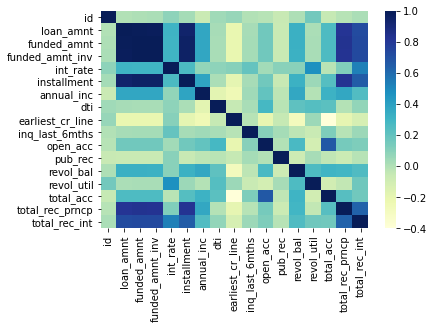

In [99]:
corr = lc[['id','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
           'int_rate', 'installment','annual_inc', 'dti', 'earliest_cr_line', 
           'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
           'total_acc', 'total_rec_prncp', 'total_rec_int'
           ]].corr()

sns.heatmap(corr, cmap="YlGnBu")

In [100]:
corr

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int
id,1.000000,0.004178,0.011103,0.017539,0.086868,0.033664,-0.062071,0.044517,0.067164,0.003698,-0.006402,-0.055415,0.011139,0.162849,-0.047536,-0.011804,0.016361
loan_amnt,0.004178,1.000000,0.991077,0.988562,0.308443,0.945227,0.374833,0.026780,-0.208462,0.031099,0.165942,-0.057050,0.329235,0.020233,0.266225,0.821542,0.729605
funded_amnt,0.011103,0.991077,1.000000,0.997680,0.303362,0.959753,0.373535,0.025584,-0.204689,0.034388,0.166063,-0.058249,0.327480,0.021073,0.263555,0.831536,0.733411
funded_amnt_inv,0.017539,0.988562,0.997680,1.000000,0.302945,0.959195,0.371554,0.025192,-0.204024,0.036248,0.165525,-0.057969,0.325388,0.022395,0.261671,0.829373,0.734486
int_rate,0.086868,0.308443,0.303362,0.302945,1.000000,0.267857,0.076103,0.091614,0.106189,0.199540,0.038537,0.098385,0.102212,0.470893,-0.014897,0.124425,0.531955
installment,0.033664,0.945227,0.959753,0.959195,0.267857,1.000000,0.385192,0.017451,-0.181788,0.030727,0.163820,-0.052710,0.325749,0.056484,0.243247,0.827792,0.660184
annual_inc,-0.062071,0.374833,0.373535,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.245650,0.048186,0.202596,-0.025920,0.369286,-0.005319,0.319062,0.365577,0.253143
dti,0.044517,0.026780,0.025584,0.025192,0.091614,0.017451,-0.176920,1.000000,-0.046850,0.025207,0.285946,-0.016486,0.213272,0.243479,0.224204,-0.004552,0.077365
earliest_cr_line,0.067164,-0.208462,-0.204689,-0.204024,0.106189,-0.181788,-0.245650,-0.046850,1.000000,-0.010438,-0.200414,-0.046757,-0.278942,0.053807,-0.400211,-0.190829,-0.120073
inq_last_6mths,0.003698,0.031099,0.034388,0.036248,0.199540,0.030727,0.048186,0.025207,-0.010438,1.000000,0.107466,0.033540,-0.027261,-0.058507,0.125891,-0.006609,0.054989


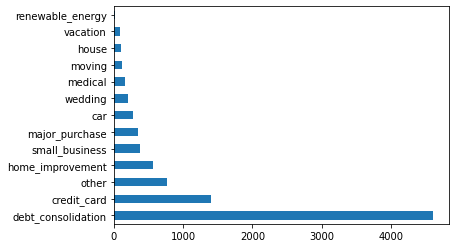

In [101]:
lc["purpose"].value_counts().plot(kind='barh')

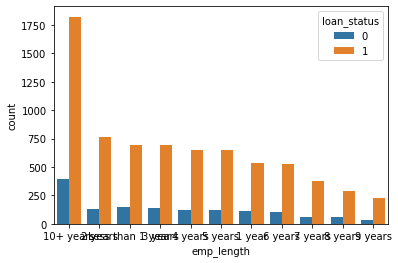

In [102]:
ax = sns.countplot(x="emp_length", data=lc, hue = 'loan_status', order = lc['emp_length'].value_counts().index)

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= lc, order = lc['grade'].value_counts().index)

In [ ]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= lc, hue = 'loan_status', order = lc['grade'].value_counts().index)

In [ ]:
df_location = lc.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], 
    z = df_location['loan_amnt'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Millions USD"
))
fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', 
)
fig.show()

# Feature Processing

In [70]:
lc1 = lc.copy()
class_mapping = {label:idx for idx, label in enumerate(np.unique(lc1['term']))}
lc1['term']=lc1['term'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(lc1['grade']))}
lc1['grade']=lc1['grade'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(lc1['addr_state']))}
lc1['addr_state']=lc1['addr_state'].map(class_mapping)

In [71]:
lc1 = pd.get_dummies(lc1,columns = ['home_ownership'])
lc1 = pd.get_dummies(lc1, columns = ['purpose'])
lc1 = pd.get_dummies(lc1, columns=["verification_status"])

In [72]:
lc1['emp_length'].unique()

array(['10+ years', 'Less than 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [73]:
emp=[]

for i in range(len(lc1)):
  tep = lc1.loc[i, 'emp_length']
  if tep == '10+ years':
    emp.append(10)
  elif tep == 'Less than 1 year':
    emp.append(1)
  elif tep == '3 years':
    emp.append(3)
  elif tep == '9 years':
    emp.append(9)
  elif tep == '4 years':
    emp.append(4)
  elif tep == '5 years':
    emp.append(5)
  elif tep == '1 year':
    emp.append(1)
  elif tep == '6 years':
    emp.append(6)
  elif tep == '2 years':
    emp.append(2)
  elif tep == '7 years':
    emp.append(7)
  elif tep == '8 years':
    emp.append(8)
  else:
    emp.append(None)

In [74]:
lc1['emp']= emp

In [75]:
lc1 = lc1.drop(['emp_length'], axis = 1 )

In [77]:
lc1.isnull().sum()

id                                       0
loan_amnt                                0
funded_amnt                              0
funded_amnt_inv                          0
term                                     0
int_rate                                 0
installment                              0
grade                                    0
annual_inc                               0
addr_state                               0
dti                                      0
earliest_cr_line                         0
inq_last_6mths                           0
open_acc                                 0
pub_rec                                  0
revol_bal                                0
revol_util                               3
total_acc                                0
out_prncp                                0
out_prncp_inv                            0
total_pymnt                              0
total_pymnt_inv                          0
total_rec_prncp                          0
total_rec_i

Missing Value Imputation

In [78]:
lc_final=lc1.copy()
lc_final['emp']=lc_final['emp'].fillna(lc1['emp'].mean())

In [79]:
#drop 3observations has missing values
lc_final = lc_final.dropna()

# **Modeling**

In [84]:
from sklearn import model_selection
y = lc_final['loan_status']
X = lc_final.drop(['loan_status'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25,stratify=y, random_state=1)

In [92]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1137]
 [   1 5613]]


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()
# Random Forest
classifier_RF = RandomForestClassifier()

Accuracy of test data


In [87]:
classifier_KNN.fit(X_train, y_train)
classifier_KNN.predict(X_test)
classifier_KNN.score(X_test, y_test)

0.8636161705908485

In [88]:
classifier_logistic.fit(X_train, y_train)
classifier_logistic.predict(X_test)
classifier_logistic.score(X_test, y_test)

0.9893380719680143

In [89]:
classifier_RF.fit(X_train, y_train)
classifier_RF.predict(X_test)
classifier_RF.score(X_test, y_test)

0.9795646379386939

By comparing accuracy score selected Neural Network as the best Model  

In [90]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
clf = RandomForestRegressor(n_jobs=-1, n_estimators=1000)

mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [91]:
mlp.predict(X_test)
mlp.score(X_test, y_test)

0.989782318969347

In [95]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 362   17]
 [   6 1866]]


In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       379
           1       0.99      1.00      0.99      1872

    accuracy                           0.99      2251
   macro avg       0.99      0.98      0.98      2251
weighted avg       0.99      0.99      0.99      2251

